In [3]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

In [4]:
def generate_features_targets(data):
    output_targets = np.empty(shape=(len(data)), dtype='<U20')
    output_targets[:] = data['class']

    input_features = np.empty(shape=(len(data), 13))
    input_features[:, 0] = data['u-g']
    input_features[:, 1] = data['g-r']
    input_features[:, 2] = data['r-i']
    input_features[:, 3] = data['i-z']
    input_features[:, 4] = data['ecc']
    input_features[:, 5] = data['m4_u']
    input_features[:, 6] = data['m4_g']
    input_features[:, 7] = data['m4_r']
    input_features[:, 8] = data['m4_i']
    input_features[:, 9] = data['m4_z']
    input_features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    input_features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    input_features[:, 12] = data['petroR50_z'] / data['petroR90_z']

    return input_features, output_targets

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

In [17]:
def calculate_accuracy(predicted, actual):
    correct = np.sum(predicted == actual)
    total = actual.shape[0]
    return correct/total

Our accuracy score: 0.791025641025641
Confusion matrix, without normalization
[[196  58   6]
 [ 50 186  24]
 [  4  21 235]]


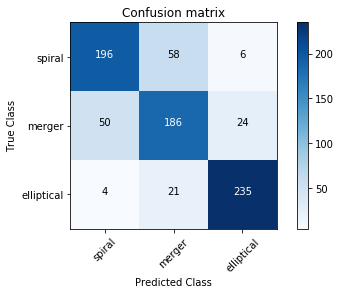

In [18]:
data = np.load('galaxy_catalogue.npy')

# split the data
features, targets = generate_features_targets(data)

# train the model to get predicted and actual classes
dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()